# Assignment \#1
# Chebyshev and Lissajous
# Solutions

 Name & ID
 
 Name & ID



## Task 1a: write a function to evaluate the Chebyshev polynomials using only core Python and the "math" module.  

Your function should be defined so that it can be called as follows:

   y = Chebyshev1_recursive(x, n)
   
in other words, the degree $n$ and a single value $x$ are provided, and a single value equal to $T_n(x)$ should be returned.

(Don't worry too much about optimization or efficiency)

The Chebyshev polynomials of the first kind are defined by the recurrence relation
https://en.wikipedia.org/wiki/Chebyshev_polynomials


 $$\begin{aligned}T_{0}(x)&=1\\T_{1}(x)&=x\\T_{n+1}(x)&=2xT_{n}(x)-T_{n-1}(x).\end{aligned} $$

In [2]:
def Chebyshev1_recursive(x,n):
    """
    This python function provides a recursive implementation of a
    Chebyshev polynomial of order "n" for a single value -1 <= x <= 1.
    
    There are no checks on input parameters.
    """
    if n==0:
        return 1
    
    if n==1:
        return x
    
    return 2*x*Chebyshev1_recursive(x,n-1) - Chebyshev1_recursive(x,n-2)

<span style="color:red">
It takes time and energy to write even a simple function like this.  Presumably we are bothering because the output from this function is important to us in some way.  By extension, we would like to avoid producing incorrect results.  This means that we should carry out some kind of tests to ensure that our function does what we expect.  
</span>

<span style="color:red">
At the very least, we should check a few test values to catch any basic mistakes. I have mentioned this several times in class, and for the *next* assignment we will start to require at least one simple test for any important functions.
</span>

In [35]:
assert( Chebyshev1_recursive(0.0, 1) == 0)
assert( Chebyshev1_recursive(1.0, 2) == 1)
assert( Chebyshev1_recursive(0.0, 2) == -1)

It would be better to try a larger set of test values for more than one polynomial.  We can define test functions for 2nd and 3rd order cases and then evaluate them for a variety of different x-values.

In [36]:
def Chebyshev_polynomial2(x):
    return 2* x**2 - 1

def Chebyshev_polynomial3(x):
    return 4* x**3 - 3*x

In [37]:
testvalues = [-1.0, -0.5, 0.0, 0.33, 0.75, 1.0]

result = []
for x in testvalues:
    myvalue, testvalue = Chebyshev1_recursive(x,2), Chebyshev_polynomial2(x)
    diff = abs(myvalue - testvalue)
    if diff > 1e-12:
        result.append('FAIL: x={}, myvalue={}, testvalue={}'.format(x, myvalue, testvalue))
if len(result) == 0: print('Testing 2nd order polynomial: PASS')   
else: print('Testing 2nd order polynomial: ' + '\n'.join(result) )  

result = []
for x in testvalues:
    myvalue, testvalue = Chebyshev1_recursive(x,3), Chebyshev_polynomial3(x)
    diff = abs(myvalue - testvalue)
    if diff > 1e-12:
        result.append('FAIL: x={}, myvalue={}, testvalue={}'.format(x, myvalue, testvalue))
if len(result) == 0: print('Testing 3rd order polynomial: PASS')   
else: print('Testing 3rd order polynomial: ' + '\n'.join(result) ) 

Testing 2nd order polynomial: PASS
Testing 3rd order polynomial: PASS


It would be nice if our test framework was more compact.  It would be even better if we were able to compare our results to some other library, such as the numpy.polynomial.chebyshev module.

In [38]:
import numpy.polynomial.chebyshev as npchebyshev

coefflist = [1]
for n in range(9):
    for x in [-1.0, -0.3, 0.0, +0.45, +0.99]:
        myvalue = Chebyshev1_recursive(x,n)
        npvalue = npchebyshev.chebval(x,coefflist)
        diff = myvalue - npvalue
        #print(n,x, npvalue, myvalue, diff)
        if abs(diff) > 1.0e-12:
            print('Error: n={}, x={}, myvalue={}, npvalue={}, diff={}'.format(n, x, myvalue, npvalue, diff))
    coefflist = [0] + coefflist

## Task 1b: use matplotlib to generate a good quality figure containing the first five (n=0 to 4) Chebyshev polynomials plotted between x=-1 and x=+1.

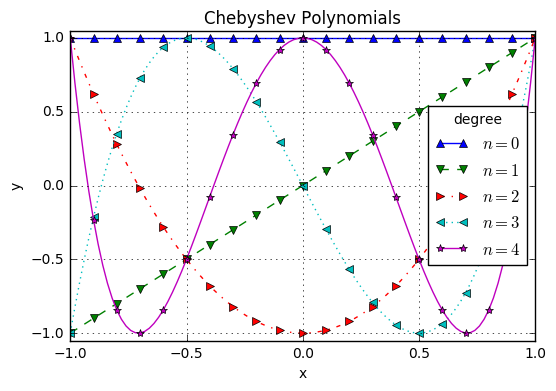

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['text.usetex'] = True

# generate a list of 100 numbers from -1.0 to +1.0
# note that this can be done in one line with numpy: x = np.linspace(-1.0, 1.0, 100) 
xlist = []
for x in range(0,101):
    xlist.append( x/50.0 - 1.0)
    
# matplotlib will cycle through colors automatically,
# but if we want different line styles and symbols
# then we have to ask for them 
#
linestylelist = ['-', '--', '-.', ':']    
markerlist = ['^', 'v', '>', '<', '*']
for n in range(5):
    ylist = []
    for x in xlist:
        ylist.append( Chebyshev1_recursive(x,n) )
    marker = markerlist[n % len(markerlist)]
    linestyle = linestylelist[n % len(linestylelist)]
    plt.plot(xlist, ylist, marker=marker, markevery=5, linestyle=linestyle, label='$n={}$'.format(n))

# a good argument could be made that these labels are not really necessary           
plt.xlabel('x')  
plt.ylabel('y')  

# a title is required
plt.title('Chebyshev Polynomials' )  

# some kind of legend is required for multiple linestyles & symbols, title is optional
plt.legend(loc=0, title='degree')  

# do this to see the $n=0$ case where y(x)=1, 
# which is otherwise indistinguishable from the upper axis
#
plt.ylim(-1.05, 1.05)  #  optional but recommended

# Note: a good argument could be made that this plot is ugly.
# Maybe using colors & symbols, but not linestyles, would be better.

# optional - adds more clutter, but easier to find zero-crossings
plt.grid('on')

## Task 2a) Lissajous figures

https://en.wikipedia.org/wiki/Lissajous_curve
    
A Lissajous curve is the graph of a system of parametric equations

 $$ x=A\sin(at+\delta ) \\
    y=B\sin(bt)         $$
    
The appearance of the figure is highly sensitive to the ratio  $a/b$.  Rational ratios produce closed (connected) or "still" figures, while irrational ratios produce figures that appear to rotate.

What is the smallest value of $t$ required in theory to produce a closed curve for the parameters a = 5, b = 6, $\delta=π/2$?  Use matplotlib to generate a good-quality figure containing this curve.  Show this curve "inline" the Jupyter notebook containing your answers and also save it to a file named "lissajous.pdf" which you should submit to the D2L Dropbox folder along with this notebook.

 $$ x=A\sin(at+\delta ) \\
    y=B\sin(bt)         $$
    
#x(t) = x(0) => A sin(at + \delta) = A sin(\delta) => at = n pi
#y(t) = y(0) => B sin(bt) = B sin(0) = 0 => bt = n pi

#x'(t) = x'(0) => A a cos(at+\delta) = A a cos(\delta) =>
#y'(t) = y'(0) => B b cos(bt) = B b cos(0) = B b 1 =>

In [142]:
tmax = 10.0
tlist = []
npoints = 1000
for tval in range(0,npoints+1):
    tlist.append(tval/npoints * tmax)
    
a, b, delta = 5.0, 6.0, math.pi/2.0 
x, y, xy = [], [], []
for t in tlist:
    x.append( math.sin(a*t + delta) )
    y.append( math.sin(b*t) )
    xy.append( x[-1] - y[-1] )

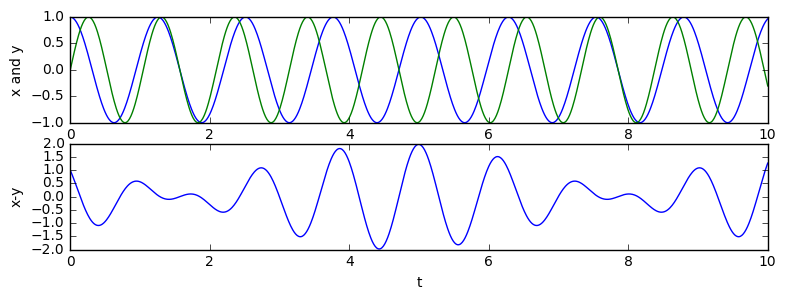

In [144]:
# This code block stacks two plots vertically.  This is *not* required,
# but students may find it useful as a reference.
#

fig, axes = plt.subplots(2,1, figsize=(9,3) )
#plt.subplots_adjust( left=0.1, bottom=None, right=0.9, top=None, wspace=0.45, hspace=None)
#axes[0].plot(x, y)
#axes[0].set_xlabel('x')
#axes[0].set_ylabel('y')

axes[0].plot(tlist, x)
axes[0].plot(tlist, y)
axes[0].set_xlabel('')
axes[0].set_ylabel('x and y')

axes[1].plot(tlist, xy)
axes[1].set_xlabel('t')
axes[1].set_ylabel('x-y')

In [141]:
import math
tmax = 2.0 * math.pi   # good reflex: type "2.0" instead of "2"
tlist = []
npoints = 1000
for tval in range(0,npoints+1):
    tlist.append(tval/npoints * tmax)
    
a, b, delta = 5.0, 6.0, math.pi/2.0
x, y, xy = [], [], []
for t in tlist:
    x.append( math.sin(a*t + delta) )
    y.append( math.sin(b*t) )
    xy.append( x[-1] - y[-1] )

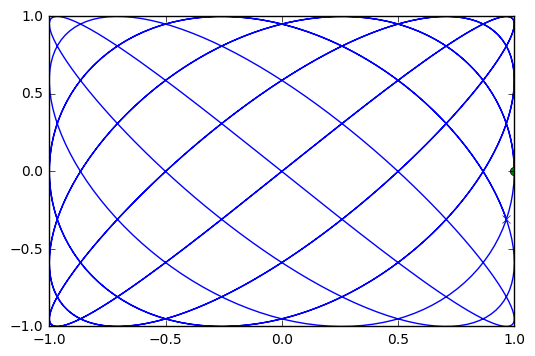

In [135]:
plt.plot(x, y)
plt.plot(x[0], y[0], 'go')
plt.plot(x[-1], y[-1], 'bx')

In [149]:
t = 2.0 * math.pi
dx = math.sin(0 + delta) - math.sin(a*t + delta)
dy = math.sin(0) - math.sin(b*t)
print( dx, dy )

plt.savefig('lissajous.pdf')

0.0 1.4695761589768238e-15


## 3) Everything is connected

Lissajous figures where a = 1, b = N (N is a natural number) and
 
 $$ \delta ={\frac {N-1}{N}}{\frac {\pi }{2}} $$
 
are supposedly also Chebyshev polynomials of degree N.

We can test this claim by re-arranging the expression for $x(t)$ 
 $$ x = A sin(a t + \delta) $$
to solve for $t(x)$, noting that $a=1$
 $$ t = sin^{-1}(x/A) - \delta $$
which we can then substitute into the expression for $y(t)$ 
 $$ y = sin(bt) $$
to get an expression for $y(x)$
 $$ y = sin(N sin^{-1}(x) - N\delta) =sin( N sin^{-1}(x) - (N-1)\frac {\pi }{2} )$$


In [110]:
def invert_lissajous(x, N=5.0):
    """
    Invert the Lissajous equations to find y(x)
    """
    delta = (N-1.0)/N *  (math.pi / 2.0)
    t = math.asin(x) - delta
    y = math.sin(N*t)
    return y

# This should be true for any value of $x$,
# but we'll just try one for now
#
x = 0.333
y1 = Chebyshev1_recursive(x, 5)
y2 = invert_lissajous(x, 5)
assert( abs(y2-y1) <= 1e-12 )  # test for approximate floating-point equality

We are asked to use 5 special test values given by

 $$ x_k = \cos \left( \frac{2k-1}{2n} \pi \right), \quad k=1,\ldots,n $$

<span style="color:red">
If we read the Wikipedia article mentioned above, we should realize that these are "roots" or zeros of the Chebyshev polynomial.
In general, you may find it helpful to look at the links provided in these notes.
</span>

<span style="color:red">
I will carry out some tests using the zeros.  This is not required for this assignment, but you should get in the habit of doing this kind of thing.
</span>

In [85]:
def chebyshev_roots(N):
    result = []
    for k in range(1,N+1):
        arg = (2*k-1.0) / (2*N) * math.pi
        result.append( math.cos(arg) )
    return result
    
N = 5
crootx = chebyshev_roots(N) 
crooty = []
for x in crootx:
    crooty.append( Chebyshev1_recursive(x, N) )
    
    
print("chebyshev roots x: ", crootx)
print("chebyshev roots y: ", crooty)    # these values should all be very nearly zero

chebyshev roots x:  [0.9510565162951535, 0.5877852522924731, 6.123233995736766e-17, -0.587785252292473, -0.9510565162951535]
chebyshev roots y:  [-4.440892098500626e-16, 0.0, 3.0616169978683826e-16, -7.771561172376096e-16, 4.440892098500626e-16]


In [111]:
N = 5
lrootx = chebyshev_roots(N)
lrooty = []
for x in lrootx:
    lrooty.append( invert_lissajous(x, N) )

print("lissajous roots x: ", lrootx)
print("lissajous roots y: ", lrooty)    # these values should all be very nearly zero) 

lissajous roots x:  [0.9510565162951535, 0.5877852522924731, 6.123233995736766e-17, -0.587785252292473, -0.9510565162951535]
lissajous roots y:  [0.0, -1.2246467991473532e-16, 2.4492935982947064e-16, -3.6739403974420594e-16, 4.898587196589413e-16]


## Tabulating data

The purpose of a table is to organize a collection of numbers to clearly display patterns and relationships.

There are a wide variety of tools for creating beautifully formatted tables, but in many cases we just want to produce some rows and columns (with labels!) where the numbers are appropriately formatted and aligned.

In [147]:
fstring = '{:2d} \t{:+011.8f} \t{:+015.10e} \t{:+015.10e} \t{:+015.10e}' #.format(n, x, y1, y2, dy)
print(' n \t x      \t chebyshev          \t lissajous      \t difference')
for i in range(5):
    print( fstring.format(i, crootx[i], crooty[i], lrooty[i], crooty[i]-lrooty[i]))

 n 	 x      	 chebyshev          	 lissajous      	 difference
 0 	+0.95105652 	-4.4408920985e-16 	+0.0000000000e+00 	-4.4408920985e-16
 1 	+0.58778525 	+0.0000000000e+00 	-1.2246467991e-16 	+1.2246467991e-16
 2 	+0.00000000 	+3.0616169979e-16 	+2.4492935983e-16 	+6.1232339957e-17
 3 	-0.58778525 	-7.7715611724e-16 	-3.6739403974e-16 	-4.0976207749e-16
 4 	-0.95105652 	+4.4408920985e-16 	+4.8985871966e-16 	-4.5769509809e-17


We could spend a few more minutes adding cell boundaries, but in my opinion they don't make a big difference.   
   
    |---+-------------|-------------------|-------------------|--------------------|
    | n | x           | chebyshev         | lissajous         | difference         |
    |---+-------------+-------------------+-------------------+--------------------+
    | 0 | +0.95105652 | -4.4408920985e-16 | +0.0000000000e+00 | -4.4408920985e-16  |
    | 1 | +0.58778525 | +0.0000000000e+00 | -1.2246467991e-16 | +1.2246467991e-16  |
    | 2 | +0.00000000 | +3.0616169979e-16 | +2.4492935983e-16 | +6.1232339957e-17  |
    | 3 | -0.58778525 | -7.7715611724e-16 | -3.6739403974e-16 | -4.0976207749e-16  |
    | 4 | -0.95105652 | +4.4408920985e-16 | +4.8985871966e-16 | -4.5769509809e-17  |
    |---|-------------|-------------------|-------------------|--------------------|

## ipython

<span style="color:red">
All of the following material is optional for this assignment.
</span>

Jupyter and Spyder both use the iPython framework which provides tools for organizing and presenting information.  We can get access to these tools by importing the appropriate modules.  The "IPython.display" module can take strings containing HTML (or Markdown or LaTex) code and display them directly.  

This means that we can write code to automatically generate tables.

In [148]:
from IPython.display import display_markdown, display_html, display_latex

def display_html_table( data ):
    htmllist = ['<table>']
    for row in data:
        rowstring = '<tr>'
        for col in row:
            rowstring += '<td>' + str(col) + '</td>'
        htmllist.append( rowstring + '</tr>')
    htmllist += ['</table>']
    htmlstring = '\n'.join(htmllist) 
    display_html(htmlstring, raw=True)
    
fstring = '{:2d} \t{:+011.8f} \t{:+010.4e} \t{:+010.4e} \t{:+010.4e}' #.format(n, x, y1, y2, dy)
datalist = [['n', 'x', 'chebyshev', 'lissajous', 'difference']]
for i in range(5):
    row =  fstring.format(i, crootx[i], crooty[i], lrooty[i], crooty[i]-lrooty[i] )
    datalist.append( list( row.split() ))
    
# print(datalist)
display_html_table( datalist )

n,x,chebyshev,lissajous,difference
0,+0.95105652,-4.4409e-16,+0.0000e+00,-4.4409e-16
1,+0.58778525,+0.0000e+00,-1.2246e-16,+1.2246e-16
2,+0.00000000,+3.0616e-16,+2.4493e-16,+6.1232e-17
3,-0.58778525,-7.7716e-16,-3.6739e-16,-4.0976e-16
4,-0.95105652,+4.4409e-16,+4.8986e-16,-4.5770e-17


In [ ]:
# Much more compact way to generate HTML tables in ipython.
#
#display_html('<table><tr>{}</tr></table>'.format(
#        '</tr><tr>'.join(
#            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in datalist)
#        ), raw=True)